In [2]:
from __future__ import division
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, KFold, LeaveOneOut
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

import statsmodels.api as sm
import statsmodels.formula.api as smf



%matplotlib inline
plt.style.use('seaborn')
# pd.reset_option('all')


%cd C:\Users\yo\Documents\ML_and_Python\ML_and_Python_books\ISLR\ISLR-python\Notebooks\Data


C:\Users\yo\Documents\ML_and_Python\ML_and_Python_books\ISLR\ISLR-python\Notebooks\Data


# p-values sklearn with f_regression()

In [30]:
# the output of f_regression is F values of features and p-values of F scores
smarket = pd.read_csv('smarket.csv', index_col=0, parse_dates=True)
smarket.ix[smarket['Direction'] == 'Up', 'Direction'] = 1
smarket.ix[smarket['Direction'] == 'Down', 'Direction'] = 0
smarket['Direction'] = smarket['Direction'].astype(int)
X = smarket[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = smarket['Direction']
smarket.head()
for item1, item2 in zip(X.columns, f_regression(X,y)[1]): print('p-value for:', item1, "...", item2)

smarket.

p-value for: Year ... 0.00831900489589
p-value for: Lag1 ... 0.16008618568
p-value for: Lag2 ... 0.394947042921
p-value for: Lag3 ... 0.828545905131
p-value for: Lag4 ... 0.881647063963
p-value for: Lag5 ... 0.848113239993
p-value for: Volume ... 0.41751849994


Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [34]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [51]:
# loading Auto file
auto = pd.read_csv('Auto.csv', na_values='?').dropna()
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = auto['mpg']
for item1, item2 in zip(X.columns, f_regression(X,y)[1]): print('p-value for:', item1, "...", item2)
auto.info()
                   

p-value for: cylinders ... 1.3113836371e-80
p-value for: displacement ... 1.6606418278e-90
p-value for: horsepower ... 7.03198902941e-81
p-value for: weight ... 6.01529605143e-102
p-value for: acceleration ... 1.7785761248e-18
p-value for: year ... 1.07579355642e-36
p-value for: origin ... 1.8110801808e-34
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


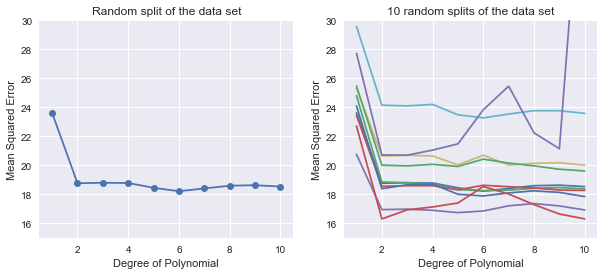

In [53]:
t_prop = 0.5
p_order = np.arange(1,11)
r_state = np.arange(0,10)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

regr = lm.LinearRegression()

# Generate 10 random splits of the dataset
for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(int(X[i,j]))
    X_poly = poly.fit_transform(auto.horsepower.values.reshape(-1,1))
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, auto.mpg.ravel(),
                                                        test_size=t_prop, random_state=Y[i,j])
                                                                        
    regr.fit(X_train, y_train)
    pred = regr.predict(X_test)
    Z[i,j]= mean_squared_error(y_test, pred)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Left plot (first split)
ax1.plot(X.T[0],Z.T[0], '-o')
ax1.set_title('Random split of the data set')

# Right plot (all splits)
ax2.plot(X,Z)
ax2.set_title('10 random splits of the data set')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2));

In [134]:
gspc2

,Open,High,Low,Close,Volume,Adj_Close,pct_change
Date,,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,3770530000,2257.830078,NaN
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,3764890000,2270.750000,0.005722
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,3761820000,2269.000000,-0.000771
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,3339890000,2276.979980,0.003517
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,3217610000,2268.899902,-0.003549
2017-01-10,2269.719971,2279.270020,2265.270020,2268.899902,3638790000,2268.899902,0.000000
2017-01-11,2268.600098,2275.320068,2260.830078,2275.320068,3620410000,2275.320068,0.002830
2017-01-12,2271.139893,2271.780029,2254.250000,2270.439941,3462130000,2270.439941,-0.002145
2017-01-13,2272.739990,2278.679932,2271.510010,2274.639893,3081270000,2274.639893,0.001850


In [340]:
gspc2[gspc2['pct_change'] <= -0.27 ]


,Adj_Close,pct_change,row_filter,cum_pct_change_ndays_after,n_days_avg_return
Date,,,,,
2014-01-30,3722.500177,-0.278585,True,0.230020,-0.006004
2017-01-03,31.430000,-0.319550,True,-0.065224,-0.006004


In [53]:
# code to select rows from a df based on certain filter criteria like pct_change > 0.007 and have as an output a df 
# with n days prior and n days after the date that corresponds to the filter
import pandas_datareader.data as web
import datetime
import itertools

# bringing stock data
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2017, 3, 27)
gspc2 = web.DataReader("HSBC", 'yahoo', start, end)
gspc2.rename(columns={'Adj Close' :'Adj_Close'}, inplace=True)
gspc2.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
gspc2['pct_change'] = gspc2['Adj_Close'].pct_change()


# gspc2['std_dev2'] = gspc2['pct_change'].std()*2
# gspc2['pct_change_mean'] = gspc2['pct_change'].mean()

# setting filter condition
condition = -0.04
row_filter, gspc2['row_filter'] = gspc2.index[gspc2['pct_change'].between(-0.06, -0.05) ],\
                                             (gspc2['pct_change'].between(-0.06, -0.05))

# window of days before and after the selected date
n = 4

selected_rows = [(pd.date_range(i - pd.DateOffset(days=n), periods=n*2+1)) for i in row_filter]
selected_rows = list(itertools.chain.from_iterable(selected_rows))

# cumulative return n-2 days later after the day on which condition occured, without counting return on the day itself
gspc2['pct_ch_nd_after'] = gspc2.Adj_Close.shift(-(n-2))/gspc2.Adj_Close - 1
gspc2['nd_avg_ret'] = gspc2.pct_ch_nd_after.mean()

final_df = gspc2.loc[selected_rows].dropna().drop_duplicates().sort_index(ascending=False)



#print(row_filter)
# removing nan due to mismatch in market days vs calendar days and removing duplicates 

print(final_df)
print(final_df[final_df.row_filter])

            Adj_Close  pct_change row_filter  pct_ch_nd_after  nd_avg_ret
Date                                                                     
2017-02-17  42.801162   -0.004534      False        -0.037877    0.000428
2015-08-28  35.631213   -0.006474      False        -0.043609    0.000428
2015-08-27  35.863395    0.026322      False        -0.012201    0.000428
2015-08-26  34.943593   -0.002295      False         0.019678    0.000428
2015-08-25  35.023964    0.021354      False         0.023967    0.000428
2015-08-24  34.291694   -0.052320       True         0.019010    0.000428
2015-08-21  36.184880   -0.029693      False        -0.032083    0.000428
2015-08-20  37.292214   -0.014397      False        -0.080460    0.000428
2011-10-04  27.642104    0.013503      False         0.052225    0.000428
2011-10-03  27.273838   -0.026551      False         0.018363    0.000428
2011-09-30  28.017738   -0.050898       True        -0.013407    0.000428
2011-09-29  29.520267    0.024802     

In [344]:
gspc2.tail()

,Adj_Close,pct_change,row_filter,cum_pct_change_ndays_after,n_days_avg_return
Date,,,,,
2017-02-14,43.509998,0.005314,False,0.009193,0.000369
2017-02-15,44.090000,0.013330,False,-0.056929,0.000369
2017-02-16,44.110001,0.000454,False,NaN,0.000369
2017-02-17,43.910000,-0.004534,False,NaN,0.000369
2017-02-21,41.580002,-0.053063,True,NaN,0.000369


In [255]:
KNN_smarket = neighbors.KNeighborsClassifier(n_neighbors=3)
KNN_smarket.fit(X_train2004, y_train2004)

print('Standard Confusion Matrix from sklearn:\n',confusion_matrix(y_test2005, KNN_smarket.predict(X_test2005)))
print('Classification Report:\n', classification_report(y_test2005, KNN_smarket.predict(X_test2005)))
print("Score :", KNN_smarket.score(X_test2005, y_test2005 ))
# print("Group means:\n" ,KNN_smarket.means_) # means that on average when market is down, two previous days market tends to be up
# print("Priors : ", KNN_smarket.priors_) # means that on average 49% market is down and 50% is up
# print("Coeffs :", QDA_smarket.coef_) - no coeffs in a Quadratic Function

Object `pd.std` not found.
